# This notebook

Has all the plots for the multiphase turbulence paper

In [1]:
pass

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import cmasher as cmr
import numpy as np
import pickle

import sys
import os

# import the codes
sys.path.append(os.path.abspath('/freya/ptmp/mpa/wuze/multiphase_turb'))
import codes
from codes.timescales import *
from codes.funcs import *
from codes.plotting.params import *
from codes.jason import plotting_def, plot_prettier

# import the paper figure file
from codes.plotting import paper as pf

plotting_def()
%matplotlib inline
%load_ext autoreload
%autoreload 2

pf

Codes imported


<module 'codes.plotting.paper' from '/freya/ptmp/mpa/wuze/multiphase_turb/codes/plotting/paper.py'>

In [3]:
figdir = '/ptmp/mpa/wuze/multiphase_turb/figures'

# Figure 1

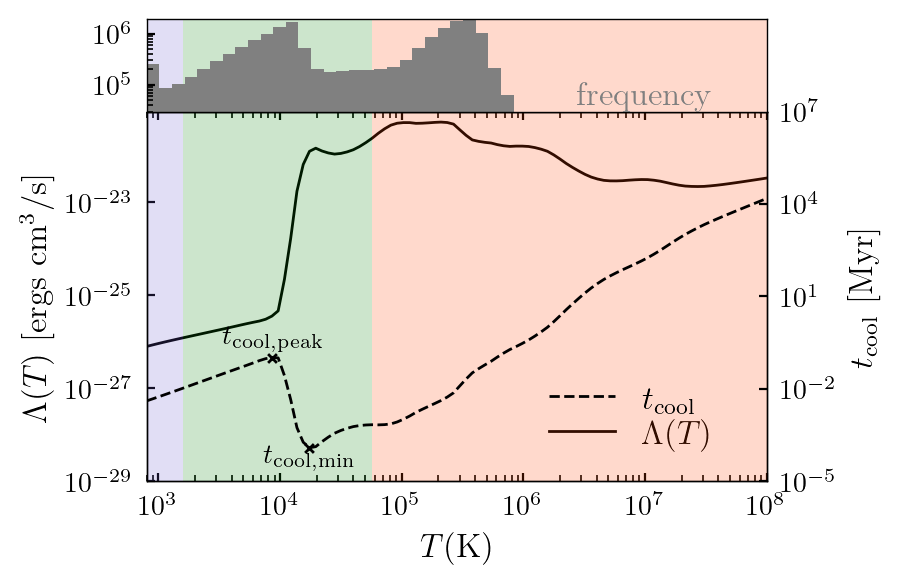

In [44]:
from codes.plotting import paper as pf

figname = 'cooling_8e2.pdf'
pf.cooling_8e2(figpath=f'{figdir}/{figname}', trial='240711_0.4_16000', shade=True)

# Figure 7

/freya/ptmp/mpa/wuze/multiphase_turb/codes/plotting/paper.py:1508: SyntaxWarning: invalid escape sequence '\%'
  fig.supxlabel(r"time [$t_{\rm cc}$]", fontsize=tfs, y=-0.07)
/freya/ptmp/mpa/wuze/multiphase_turb/codes/timescales_8e3.py:216: RuntimeWarning: divide by zero encountered in log10
  log_mass_frac = np.log10(dataf['cold_gas'] / dataf['cold_gas'][cg_st_epoch])
/freya/ptmp/mpa/wuze/multiphase_turb/codes/timescales_8e3.py:216: RuntimeWarning: divide by zero encountered in divide
  log_mass_frac = np.log10(dataf['cold_gas'] / dataf['cold_gas'][cg_st_epoch])
/freya/ptmp/mpa/wuze/multiphase_turb/codes/timescales_8e3.py:216: RuntimeWarning: invalid value encountered in divide
  log_mass_frac = np.log10(dataf['cold_gas'] / dataf['cold_gas'][cg_st_epoch])


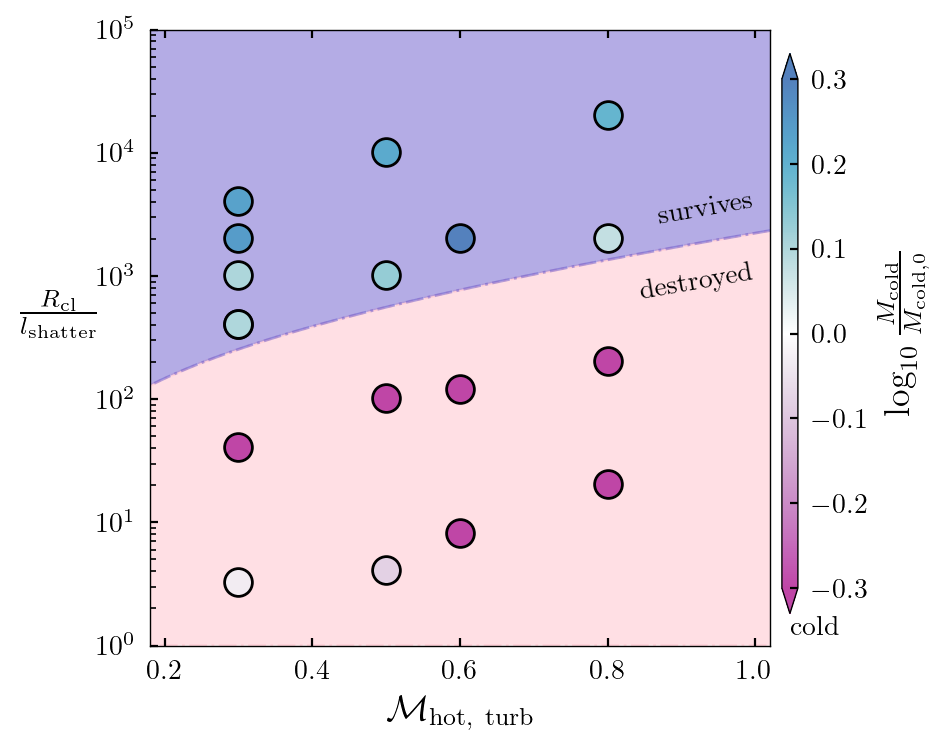

In [27]:
from codes.plotting import paper as pf

cm_cold = cmr.get_sub_cmap('cmr.viola_r', 0.25, 0.75)

figname = 'params_8e3.pdf'
_ =\
pf.params_8e3(figpath=f'{figdir}/{figname}',
              csvpath = f'/freya/ptmp/mpa/wuze/multiphase_turb/saves/cloud_8e3.csv',
              show_text=False, shade=True, tfs=10, lfs=13,
              cm=cm_cold, cg_st_epoch=10)

# Figure 5

/freya/ptmp/mpa/wuze/multiphase_turb/codes/plotting/paper.py:1642: SyntaxWarning: invalid escape sequence '\%'
  axs[0].set_ylabel('gas mass \%', fontsize=tfs, rotation=90)


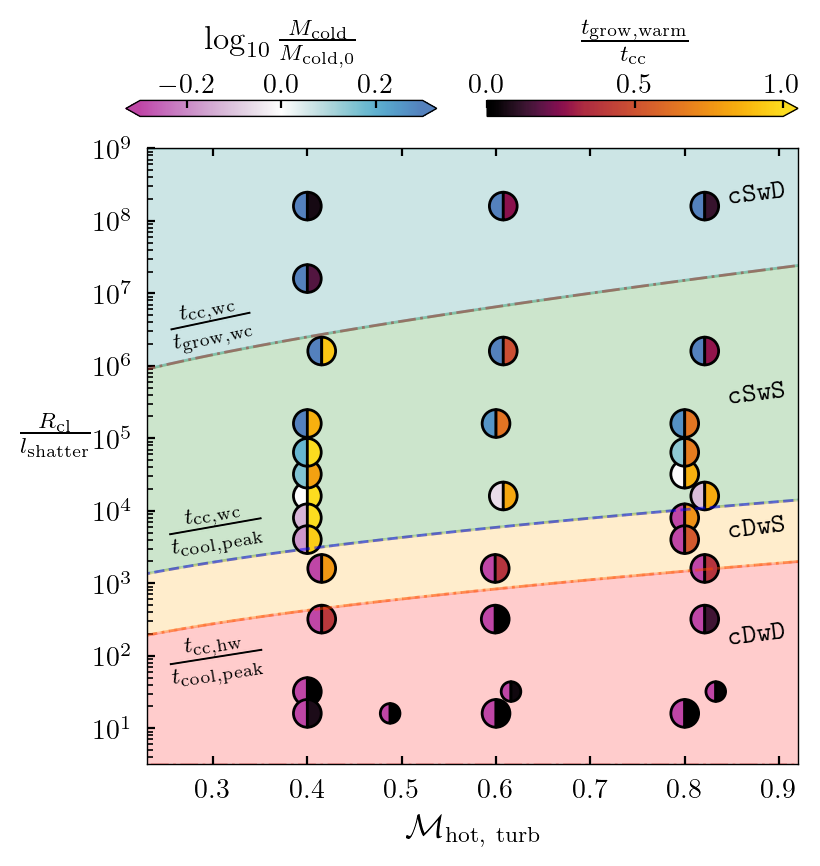

In [13]:
from codes.plotting import paper as pf

cm_cold = cmr.get_sub_cmap('cmr.viola_r', 0.25, 0.75)  #plt.colormaps['bwr_r']  # diverging colormap for cold gas
cm_warm = cmr.combine_cmaps(cmr.get_sub_cmap('cmr.wildfire', 0.5, 0.75), cmr.get_sub_cmap('cmr.wildfire', 0.75, 1), nodes=[1/3])#cmr.get_sub_cmap('cmr.ember', 0.6, 1, N=15)  #cmr.get_sub_cmap('cmr.ember', 0.3, 1, N=2)  #plt.colormaps['Oranges']  # diverging colormap for cold gas
ms = 50

figname = 'params_8e2.pdf'
pf.params_8e2(figpath=f'{figdir}/{figname}',
              pickle_path='/freya/ptmp/mpa/wuze/multiphase_turb/saves/cloud_8e2_new.pkl',
              cm_cold=cm_cold, cm_warm=cm_warm, ms=ms,
              lfs=12, tfs=10, show_text=False,  # show text of the log mass fraction
              plot_ana=True, shade=True)  # analytical lines as predicted: [warm1, cold, warm2]

# Figure 2

In [3]:
from codes.plotting import paper as pf

# the row and columns to plot
trials = ['240715_0.4_16', '240711_0.4_1600', '240711_0.4_16000', '240711_0.4_160000000']
tccs = [0, 0.5, 1, 1.5]

data_density_evol = \
pf.density_evol_load(trials=trials, tccs=tccs)

4it [01:43, 25.81s/it]


/freya/ptmp/mpa/wuze/multiphase_turb/codes/plotting/paper.py:1500: SyntaxWarning: invalid escape sequence '\%'
  axs[-1].legend(loc='upper left', bbox_to_anchor=[-0.8, -0.08], fontsize=tfs, ncols=3)


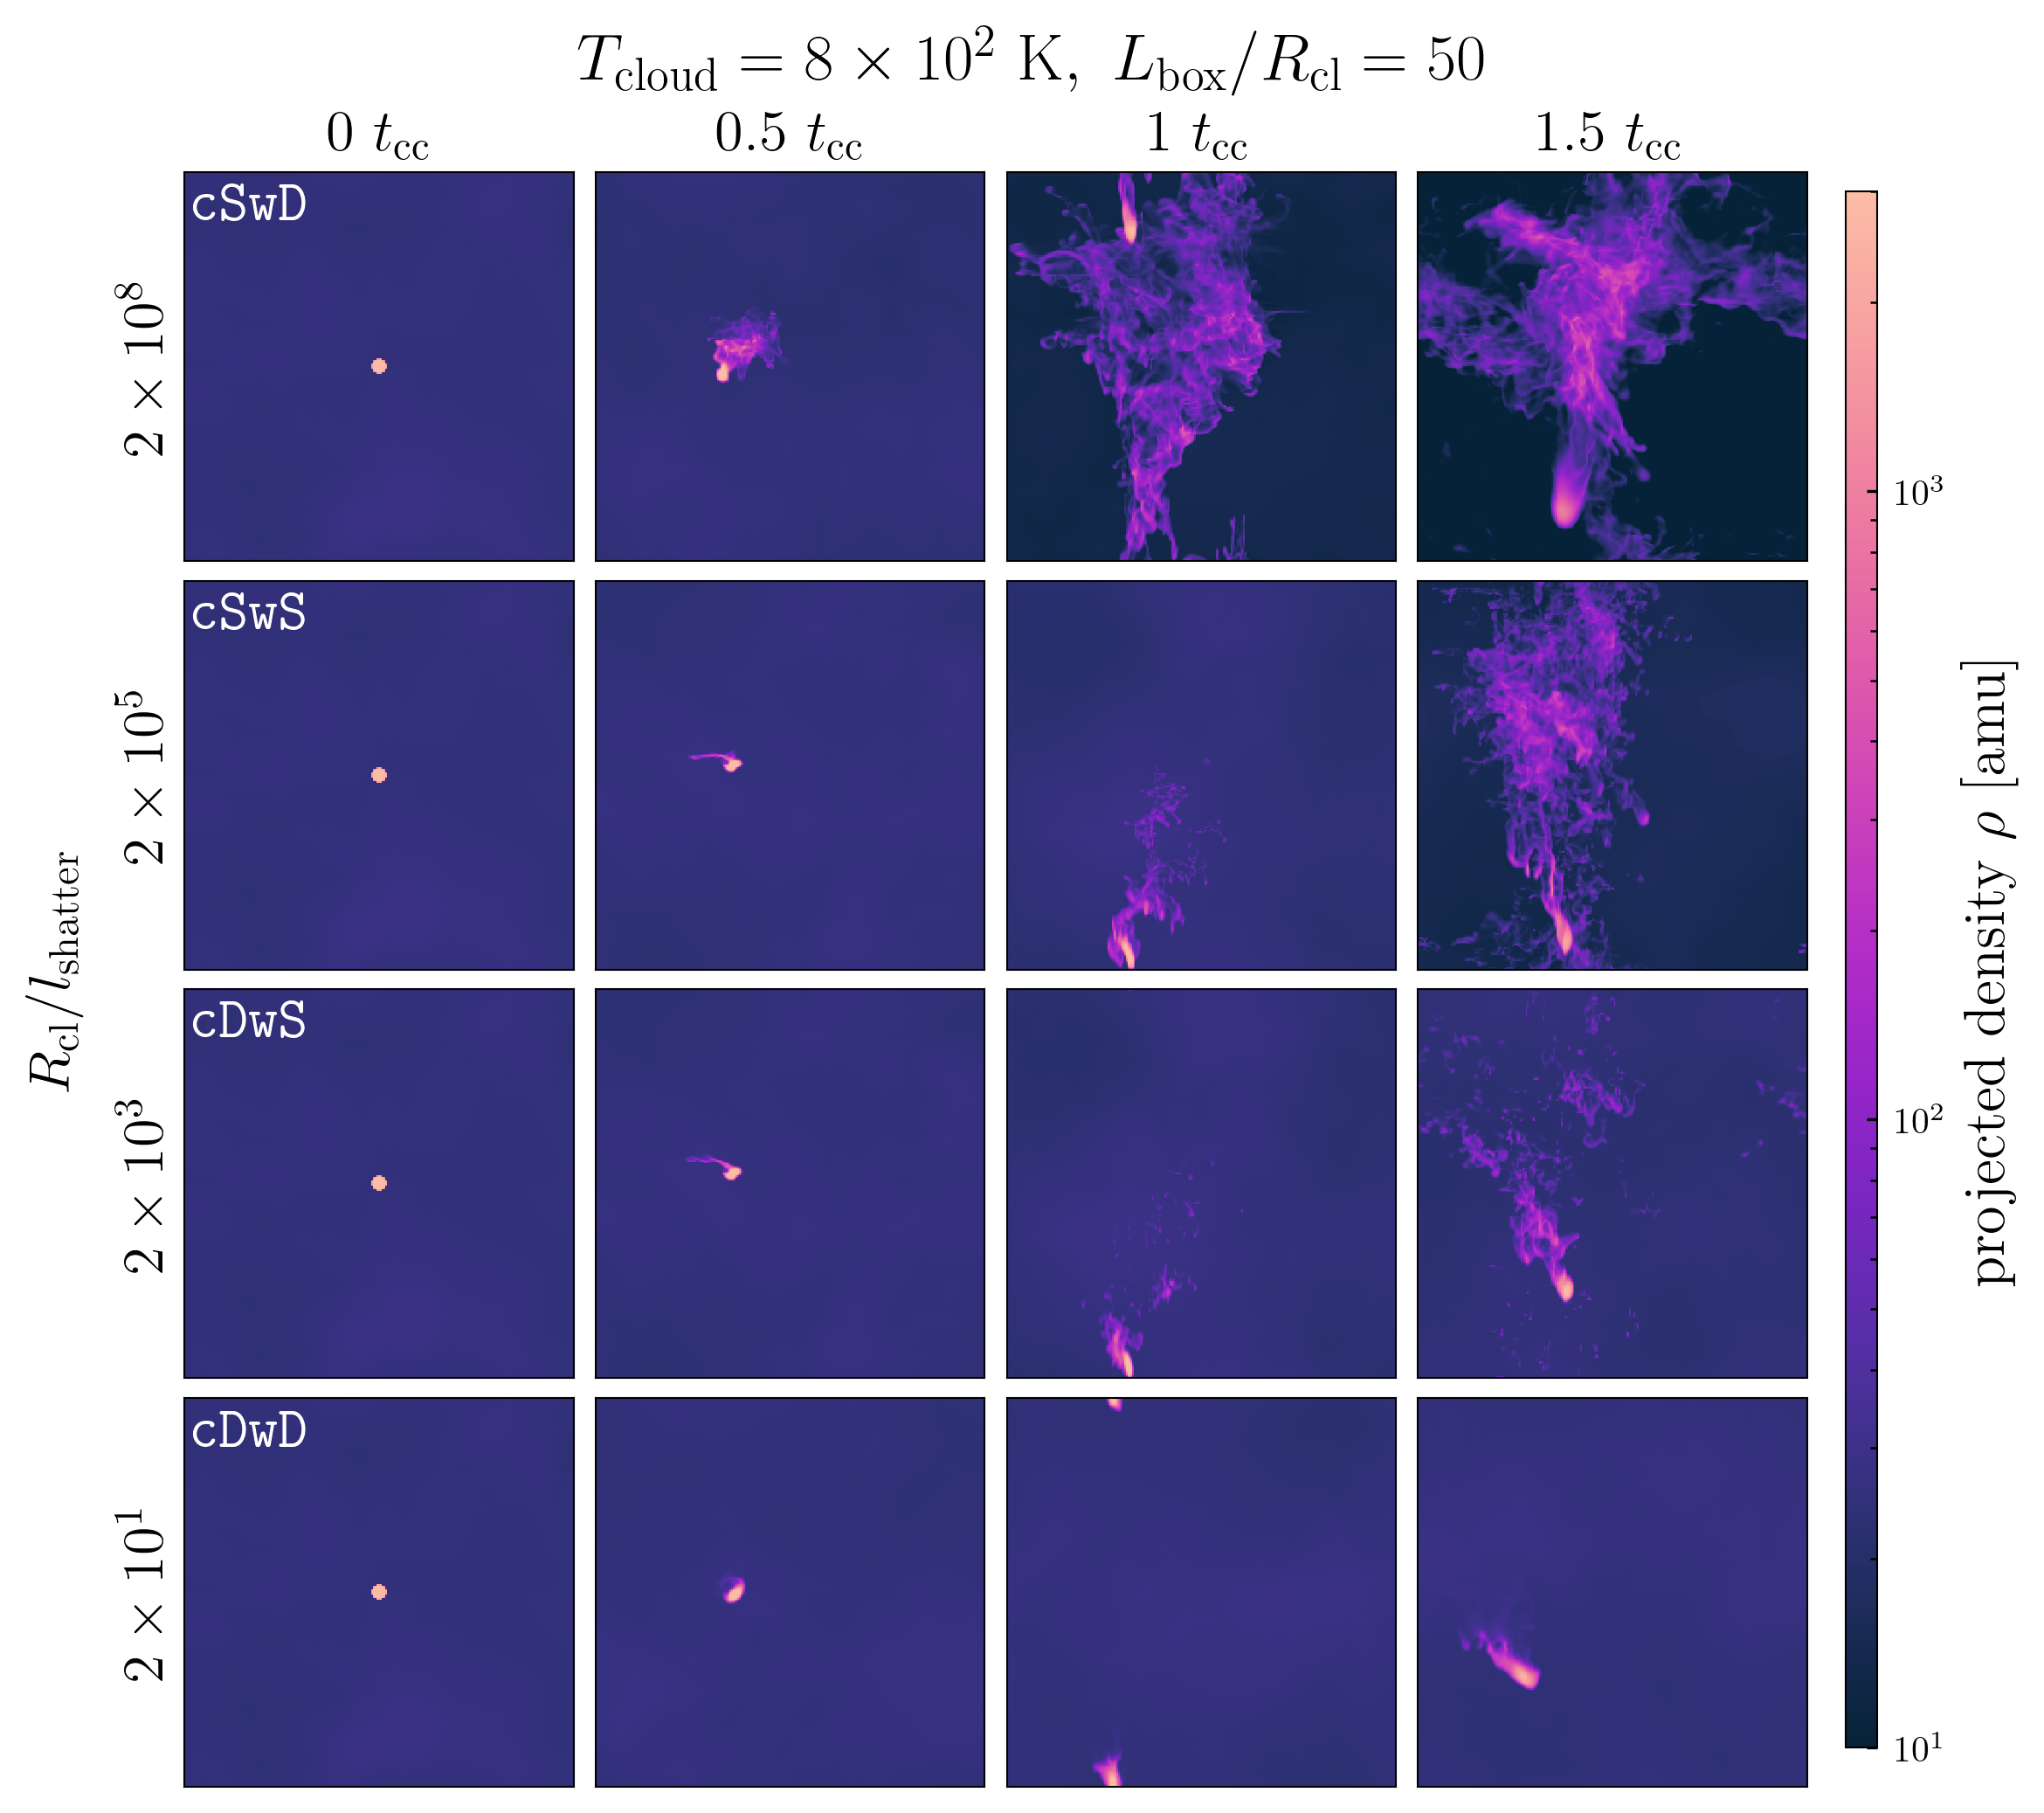

In [7]:
from codes.plotting import paper as pf

cm = cmr.get_sub_cmap('cmr.bubblegum', 0, 1)

figname = 'density_evol.pdf'
pf.density_evol_plot(data_density_evol, tccs,
                     figpath=f'{figdir}/{figname}',
                     cmap=cm, lfs=16, tfs=18)

# Figure 3

In [8]:
from codes.plotting import paper as pf

# the row and columns to plot
trials = ['240715_0.4_16', '240711_0.4_1600', '240711_0.4_16000', '240711_0.4_160000000']
tccs = [0.5, 1.5, 2, 1]

data_temp_rcl = \
pf.temp_rcl_load(trials=trials, tccs=tccs)

4it [00:33,  8.43s/it]


/freya/ptmp/mpa/wuze/multiphase_turb/codes/plotting/paper.py:1505: SyntaxWarning: invalid escape sequence '\%'
  plt.show()


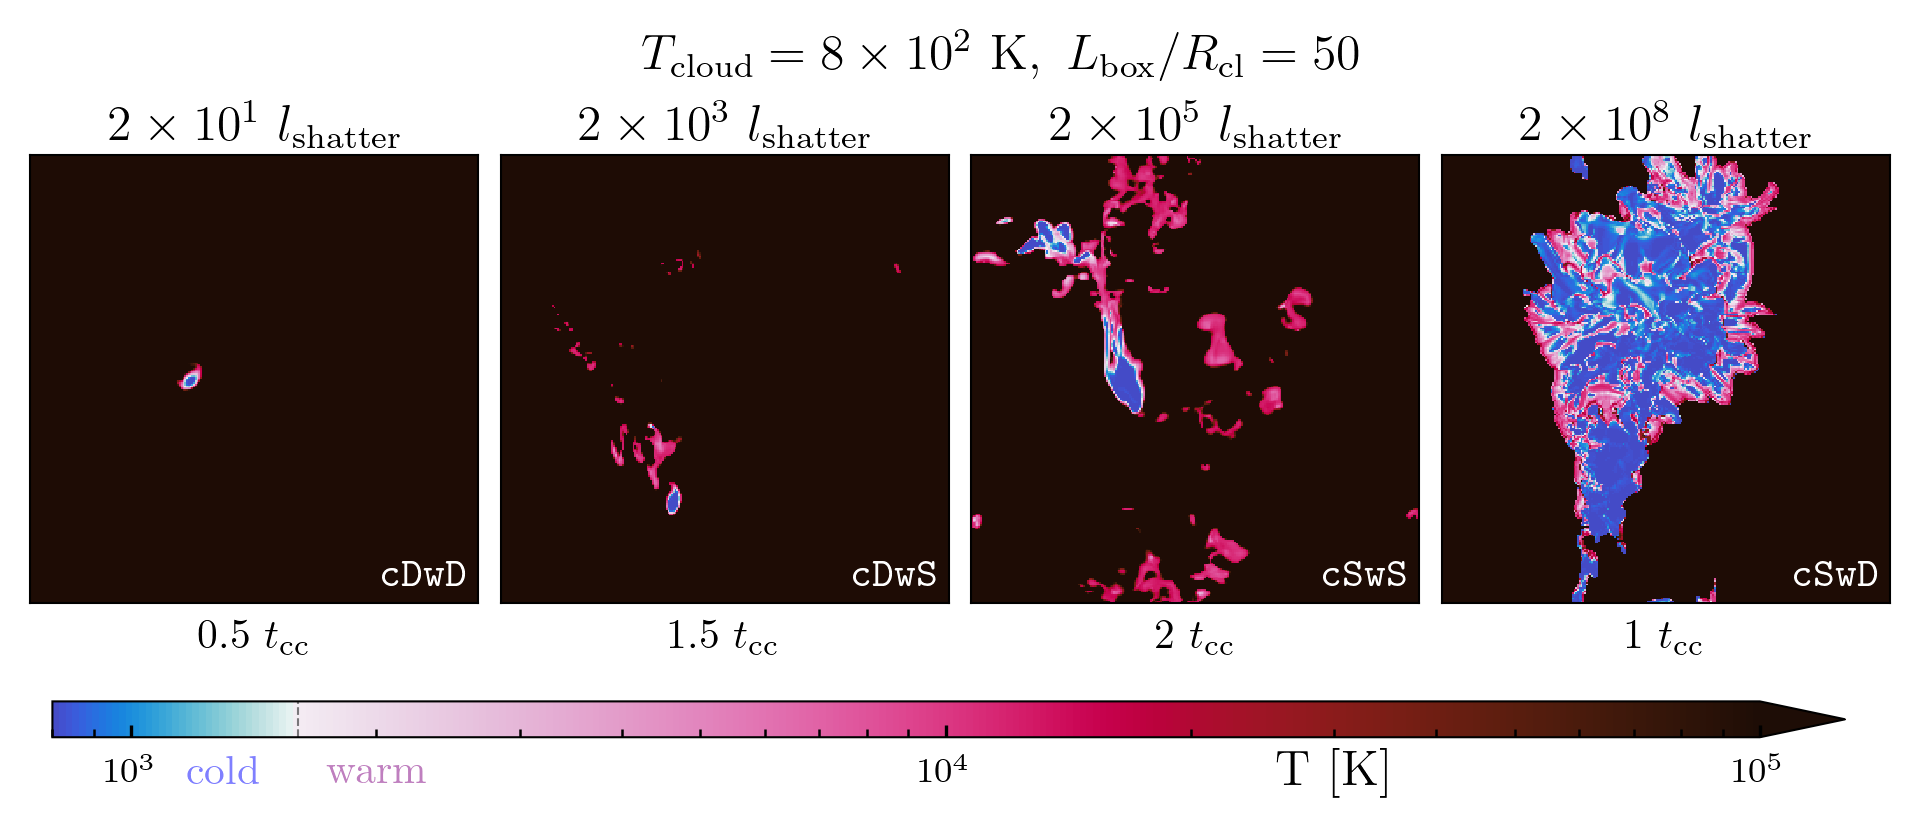

In [11]:
from codes.plotting import paper as pf

# get the colormap node (1600K) based on the limits
vmin = 800; vmax = 1e5

# the nodes for the colormap connection
cm_node = (np.log10(1600) - np.log10(vmin)) / (np.log10(vmax) - np.log10(vmin))

cm = cmr.combine_cmaps(cmr.get_sub_cmap('cmr.freeze', 0.4, 0.95), cmr.get_sub_cmap('cmr.flamingo_r', 0.05, 0.9), nodes=[cm_node])

figname = 'temp_rcl.pdf'
pf.temp_rcl_plot(data_temp_rcl, tccs,
                 figpath=f'{figdir}/{figname}',
                 vmin=vmin, vmax=vmax,
                 cmap=cm, lfs=10, tfs=12)

# Figure 4

34it [00:30,  1.11it/s] 

0.5 5000.0 0.4 160066080.92470187 50.0
11683.537755055595 160830.55716005713 0.00012171750179019365


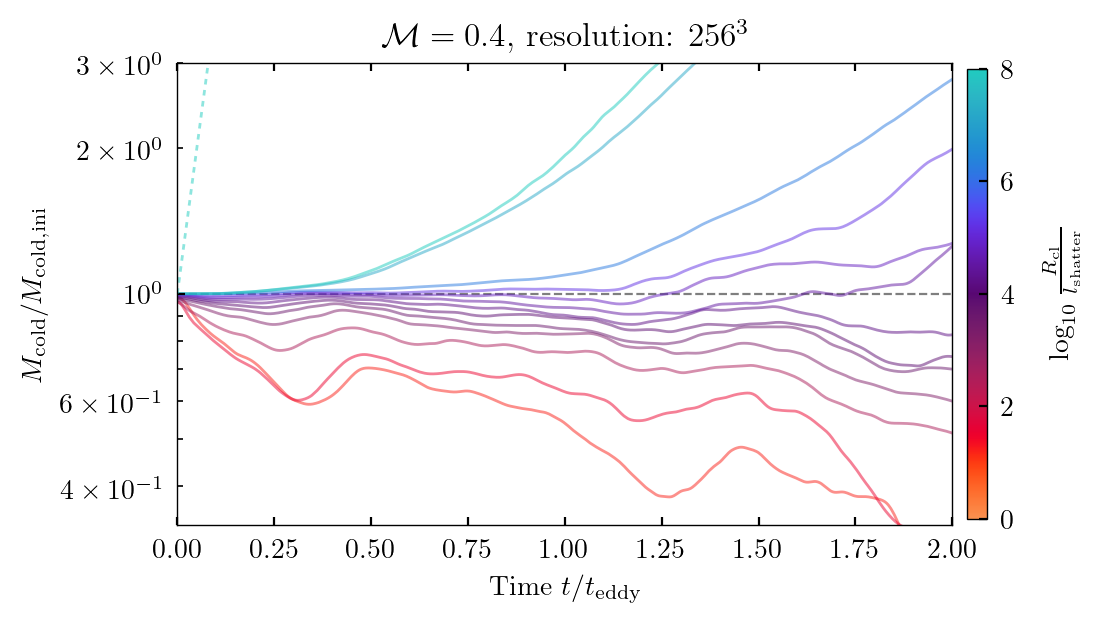

In [4]:
from codes.plotting import paper as pf

r_cl_cm = cmr.get_sub_cmap('cmr.guppy', 0, 1)

figname = 'mass_evol.pdf'
pf.mass_evol(figpath=f'{figdir}/{figname}',
             csvpath='/freya/ptmp/mpa/wuze/multiphase_turb/saves/cloud_8e2_new.csv',
             mach=0.4, cm=r_cl_cm,
             verbose=False, plot_growth=-1)

34it [00:00, 156.09it/s]


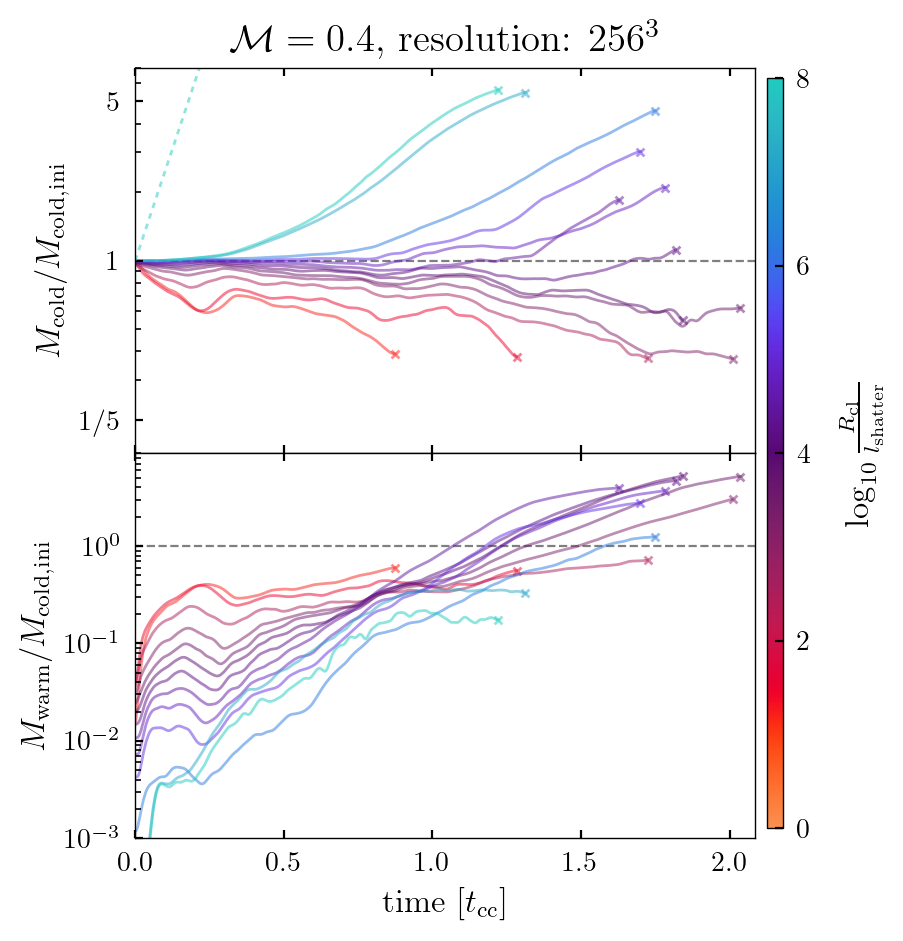

In [26]:
from codes.plotting import paper as pf

r_cl_cm = cmr.get_sub_cmap('cmr.guppy', 0, 1)

figname = 'mass_evol_both.pdf'
pf.mass_evol_both(figpath=f'{figdir}/{figname}',
                 csvpath='/freya/ptmp/mpa/wuze/multiphase_turb/saves/cloud_8e2_new.csv',
                 mach=0.4, cm=r_cl_cm,
                 verbose=False, plot_growth=-1)

# Figure 6

/freya/ptmp/mpa/wuze/multiphase_turb/codes/plotting/paper.py:1508: SyntaxWarning: invalid escape sequence '\%'
  fig.supxlabel(r"time [$t_{\rm cc}$]", fontsize=tfs, y=-0.07)


trial = 240716_0.8_4000
trial = 240709_0.6_1600000
trial = 240709_0.6_160000000


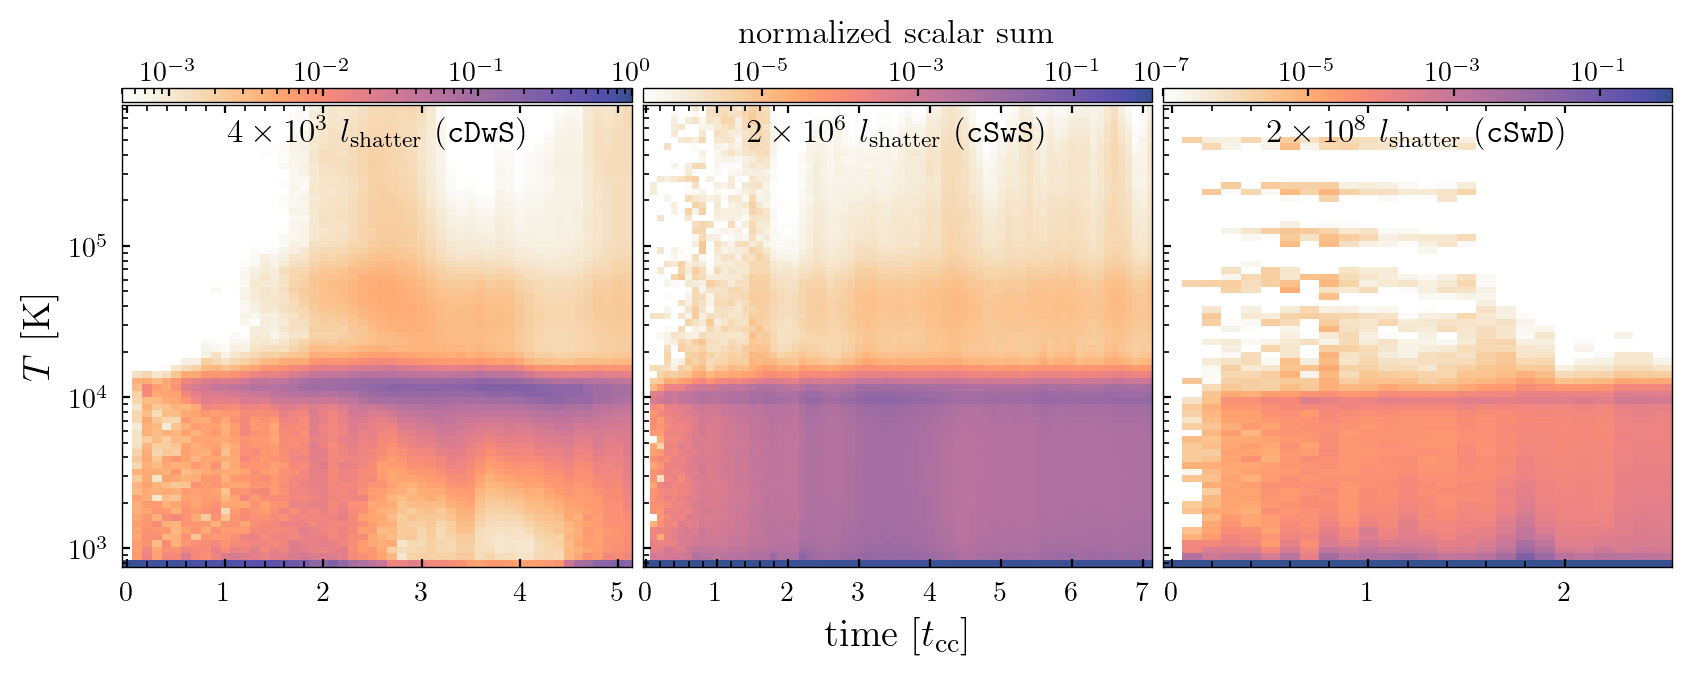

In [31]:
import json

figname = 'tracer_temp_evol.pdf'
fig_trials = ['240716_0.8_4000', '240709_0.6_1600000', '240709_0.6_160000000']
vmins = [5e-4, 3e-7, 1e-7]

cm = cmr.get_sub_cmap('cmr.torch_r', 0, 0.8)

pf.tracer_temp_evol_plot(figpath=f'{figdir}/{figname}', vmins=vmins, shading='auto',
                         trials=fig_trials, cmap=cm, lfs=12, tfs=14)

# Figure 8

/freya/ptmp/mpa/wuze/multiphase_turb/codes/plotting/paper.py:1678: SyntaxWarning: invalid escape sequence '\%'
34it [00:00, 57.72it/s]


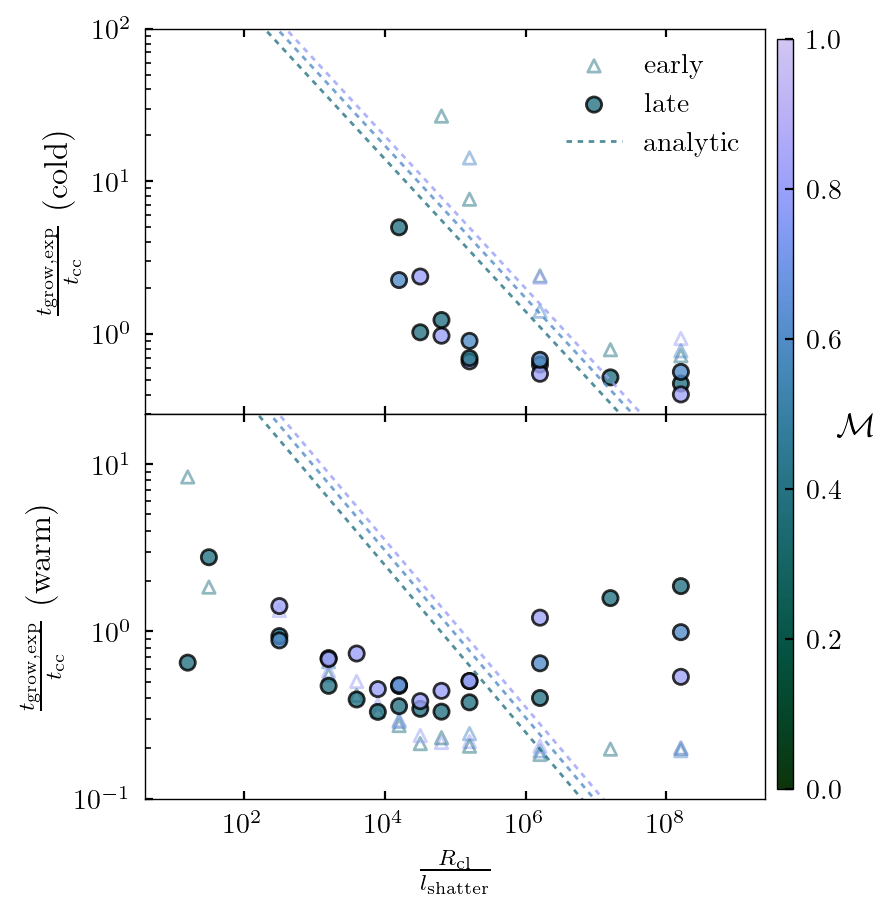

In [20]:
from codes.plotting import paper as pf

mach_cm = cmr.get_sub_cmap('cmr.horizon', 0, 0.8)
figname = 'tgrow_exp_both.pdf'
pf.tgrow_exp_both(figpath=f'{figdir}/{figname}', cm=mach_cm, lfs=12, tfs=10)

# Figure 9

/freya/ptmp/mpa/wuze/multiphase_turb/codes/plotting/paper.py:1678: SyntaxWarning: invalid escape sequence '\%'
34it [00:00, 60.69it/s]


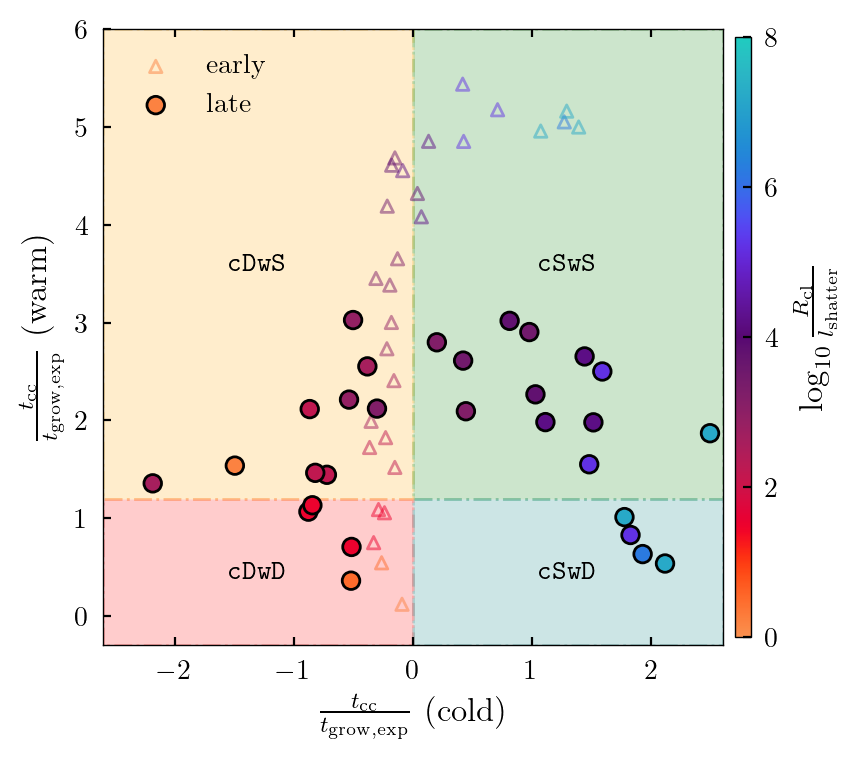

In [18]:
from codes.plotting import paper as pf

r_cl_cm = cmr.get_sub_cmap('cmr.guppy', 0, 1)

figname = 'tgrow_four_quadrants.pdf'
pf.tgrow_four_quadrants(figpath=f'{figdir}/{figname}',
                        cmap=r_cl_cm)

# Figure 10

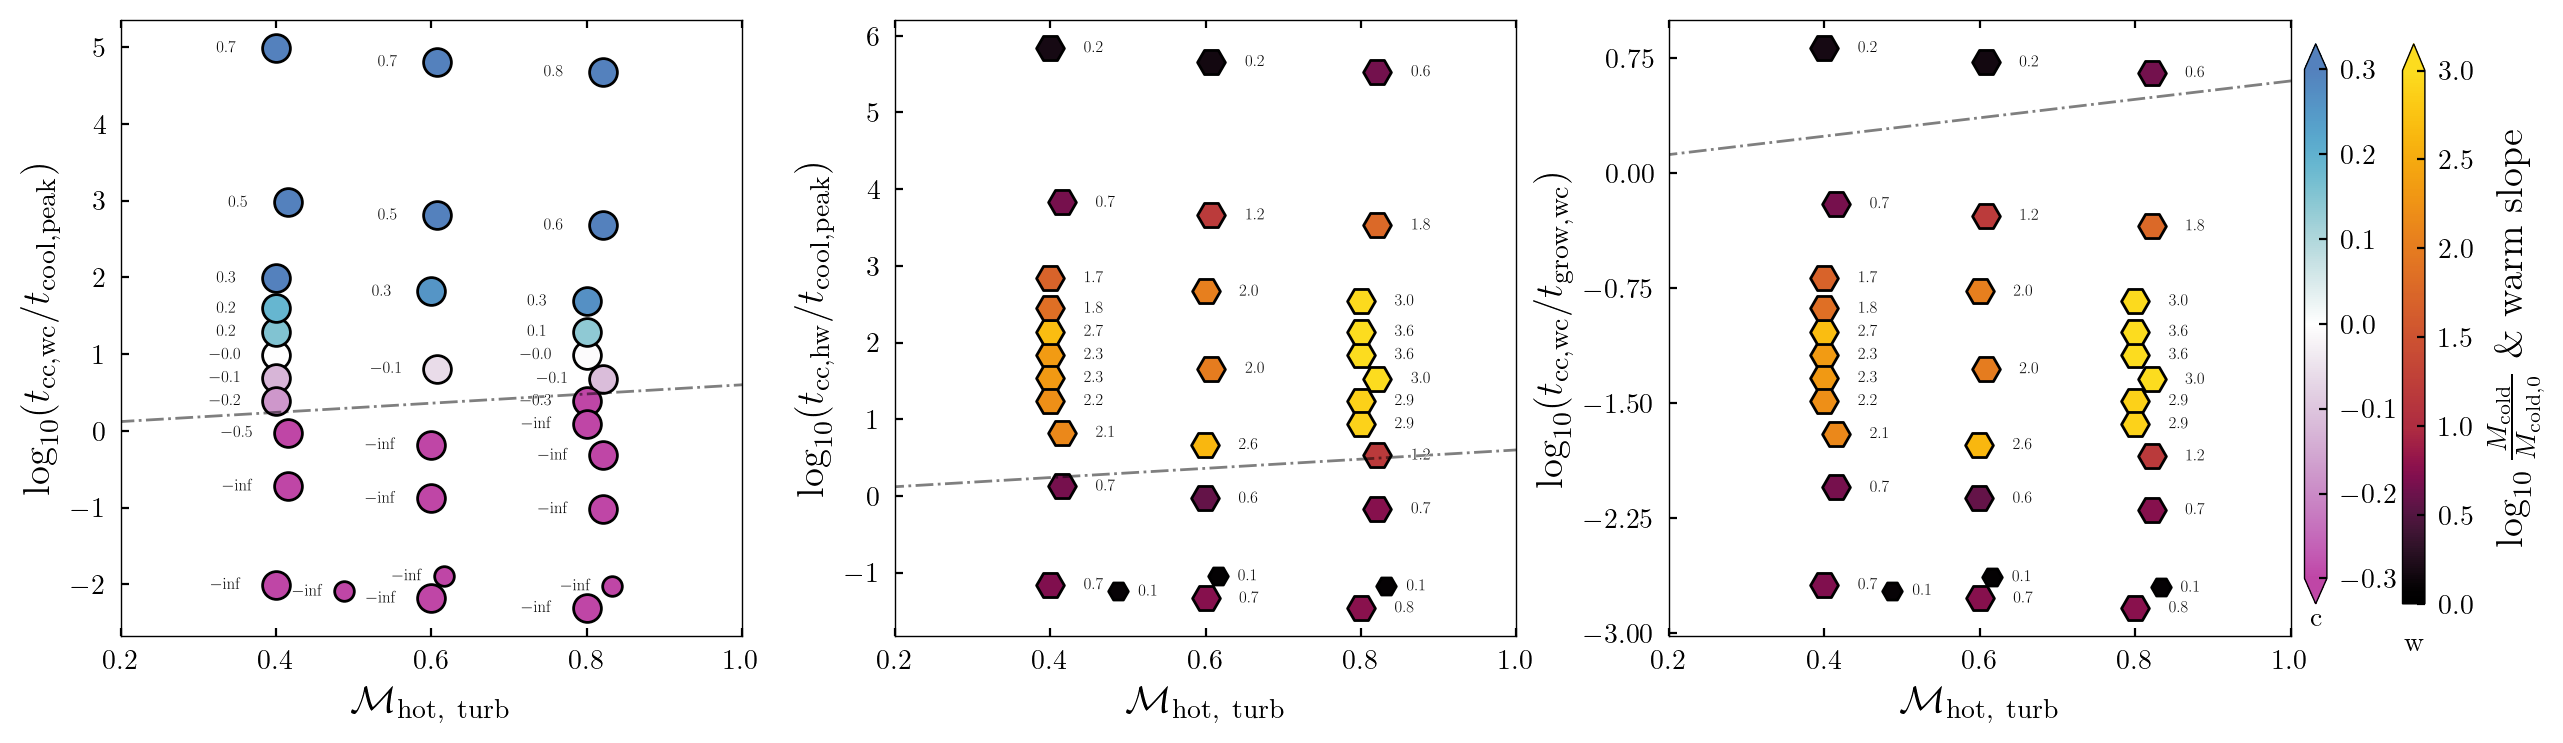

In [11]:
from codes.plotting import paper as pf

cm_cold = cmr.get_sub_cmap('cmr.viola_r', 0.25, 0.75)  #plt.colormaps['bwr_r']  # diverging colormap for cold gas
cm_warm = cmr.combine_cmaps(cmr.get_sub_cmap('cmr.wildfire', 0.5, 0.75), cmr.get_sub_cmap('cmr.wildfire', 0.75, 1), nodes=[1/3])#cmr.get_sub_cmap('cmr.ember', 0.6, 1, N=15)  #cmr.get_sub_cmap('cmr.ember', 0.3, 1, N=2)  #plt.colormaps['Oranges']  # diverging colormap for cold gas
ms = 50

figname = 'params_tcc_tchar_fit.pdf'
pf.params_tcc_tchar_fit_hori(figpath=f'{figdir}/{figname}',
                            pickle_path=f'/freya/ptmp/mpa/wuze/multiphase_turb/saves/cloud_8e2_new_timescales.pkl',
                            log_ylimu=9, ms=ms, plot_ana=True, show_text=True,
                            cm_cold=cm_cold, cm_warm=cm_warm)

/freya/ptmp/mpa/wuze/multiphase_turb/codes/plotting/paper.py:1642: SyntaxWarning: invalid escape sequence '\%'
  axs[0].set_ylabel('gas mass \%', fontsize=tfs, rotation=90)


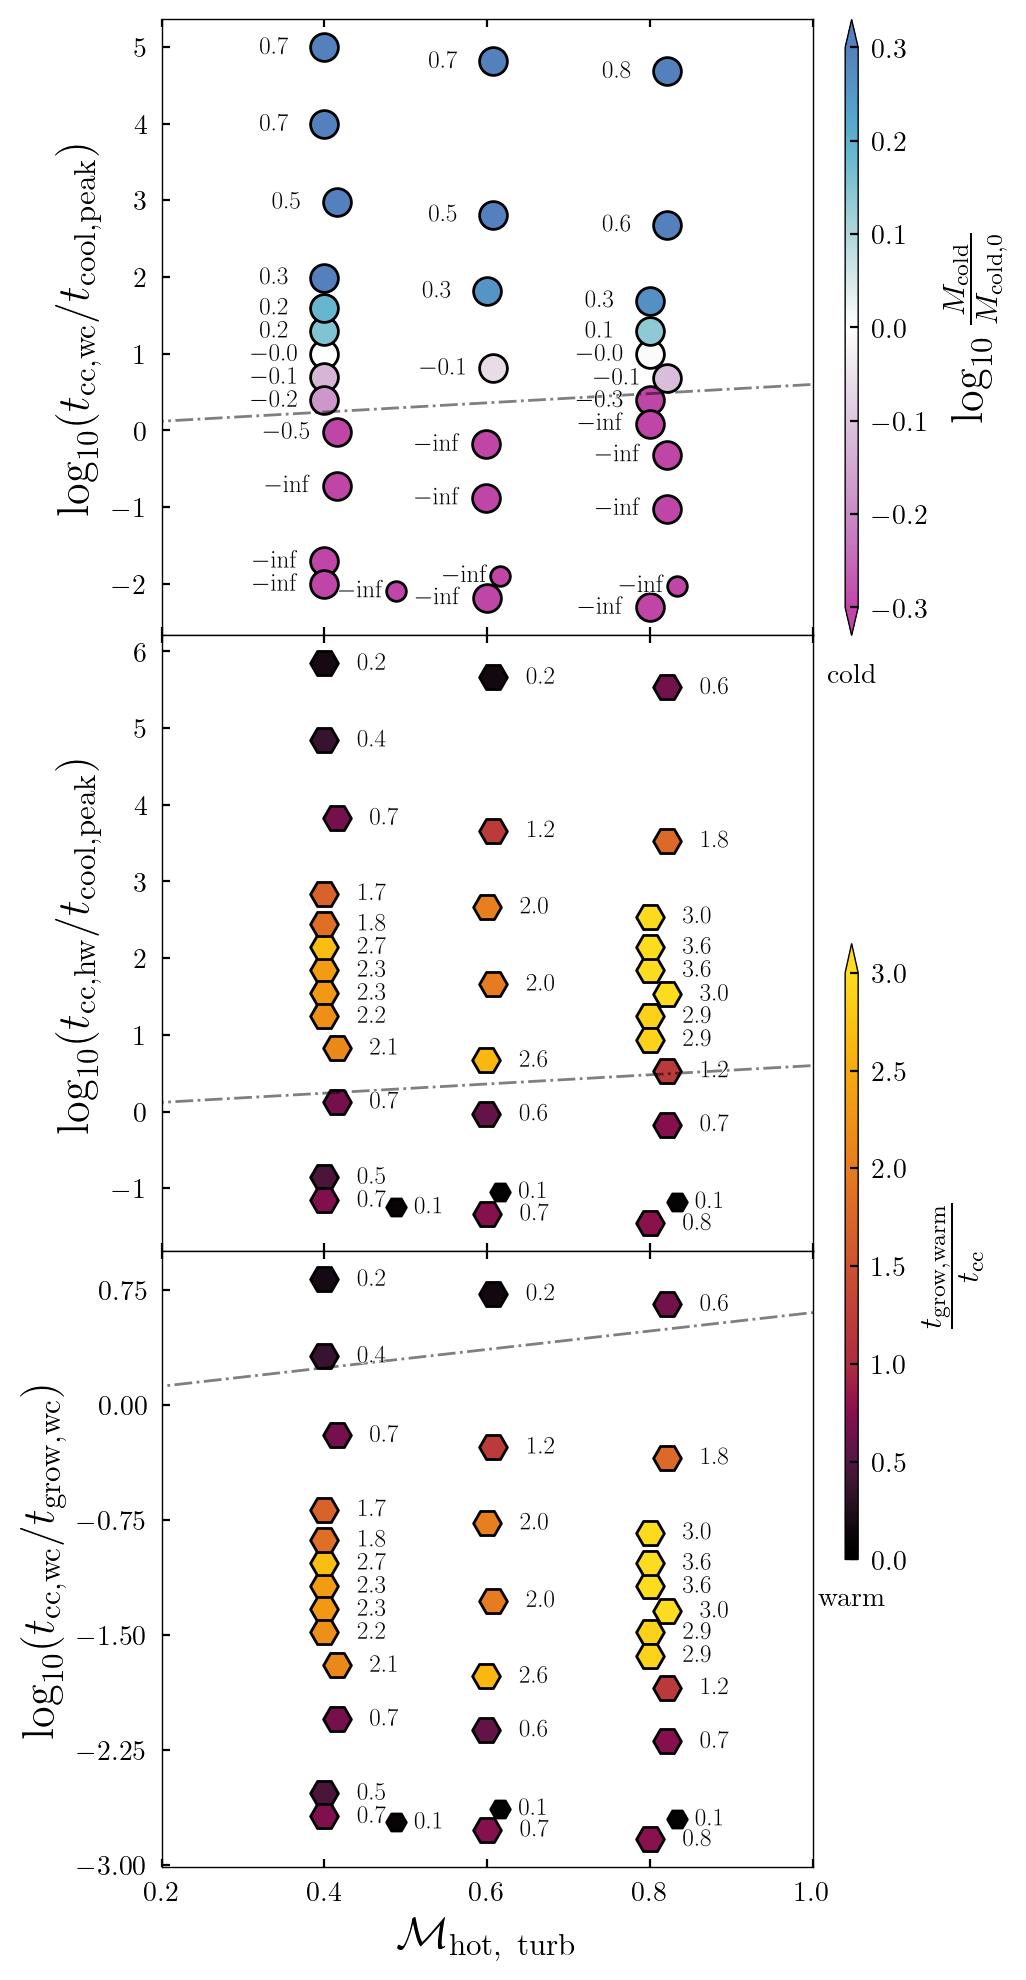

In [11]:
from codes.plotting import paper as pf

cm_cold = cmr.get_sub_cmap('cmr.viola_r', 0.25, 0.75)  #plt.colormaps['bwr_r']  # diverging colormap for cold gas
cm_warm = cmr.combine_cmaps(cmr.get_sub_cmap('cmr.wildfire', 0.5, 0.75), cmr.get_sub_cmap('cmr.wildfire', 0.75, 1), nodes=[1/3])#cmr.get_sub_cmap('cmr.ember', 0.6, 1, N=15)  #cmr.get_sub_cmap('cmr.ember', 0.3, 1, N=2)  #plt.colormaps['Oranges']  # diverging colormap for cold gas
ms = 50

figname = 'params_tcc_tchar_fit.pdf'
pf.params_tcc_tchar_fit(figpath=f'{figdir}/{figname}',
                        pickle_path=f'/freya/ptmp/mpa/wuze/multiphase_turb/saves/cloud_8e2_new_timescales.pkl',
                        log_ylimu=9, ms=ms, plot_ana=True, show_text=True, lfs=16, tfs=9,
                        cm_cold=cm_cold, cm_warm=cm_warm)

# Figure Appendix, mass plot

/freya/ptmp/mpa/wuze/multiphase_turb/codes/plotting/paper.py:1508: SyntaxWarning: invalid escape sequence '\%'
  axs[0].set_ylabel('gas mass \%', fontsize=tfs, rotation=90)


trial = 240711_0.8_320
trial = 240711_0.8_1600
trial = 240716_0.8_64000
Cropped for hot mass
trial = 240711_0.8_160000000
Cropped for hot mass


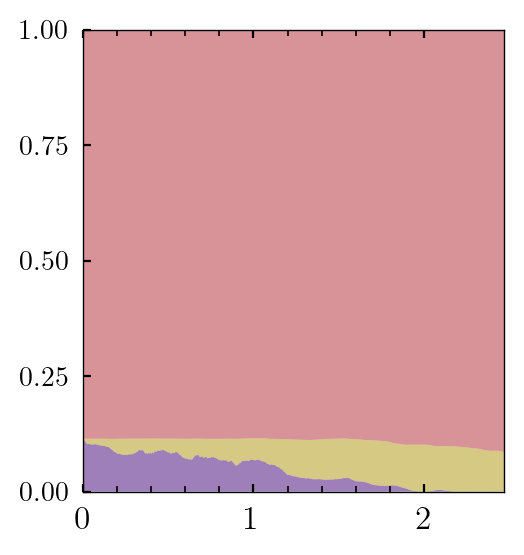

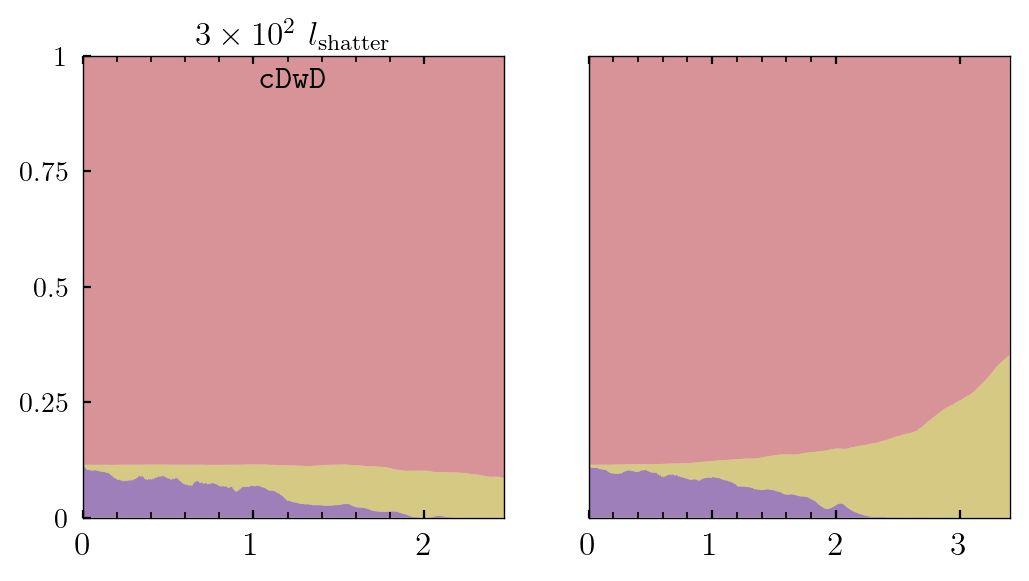

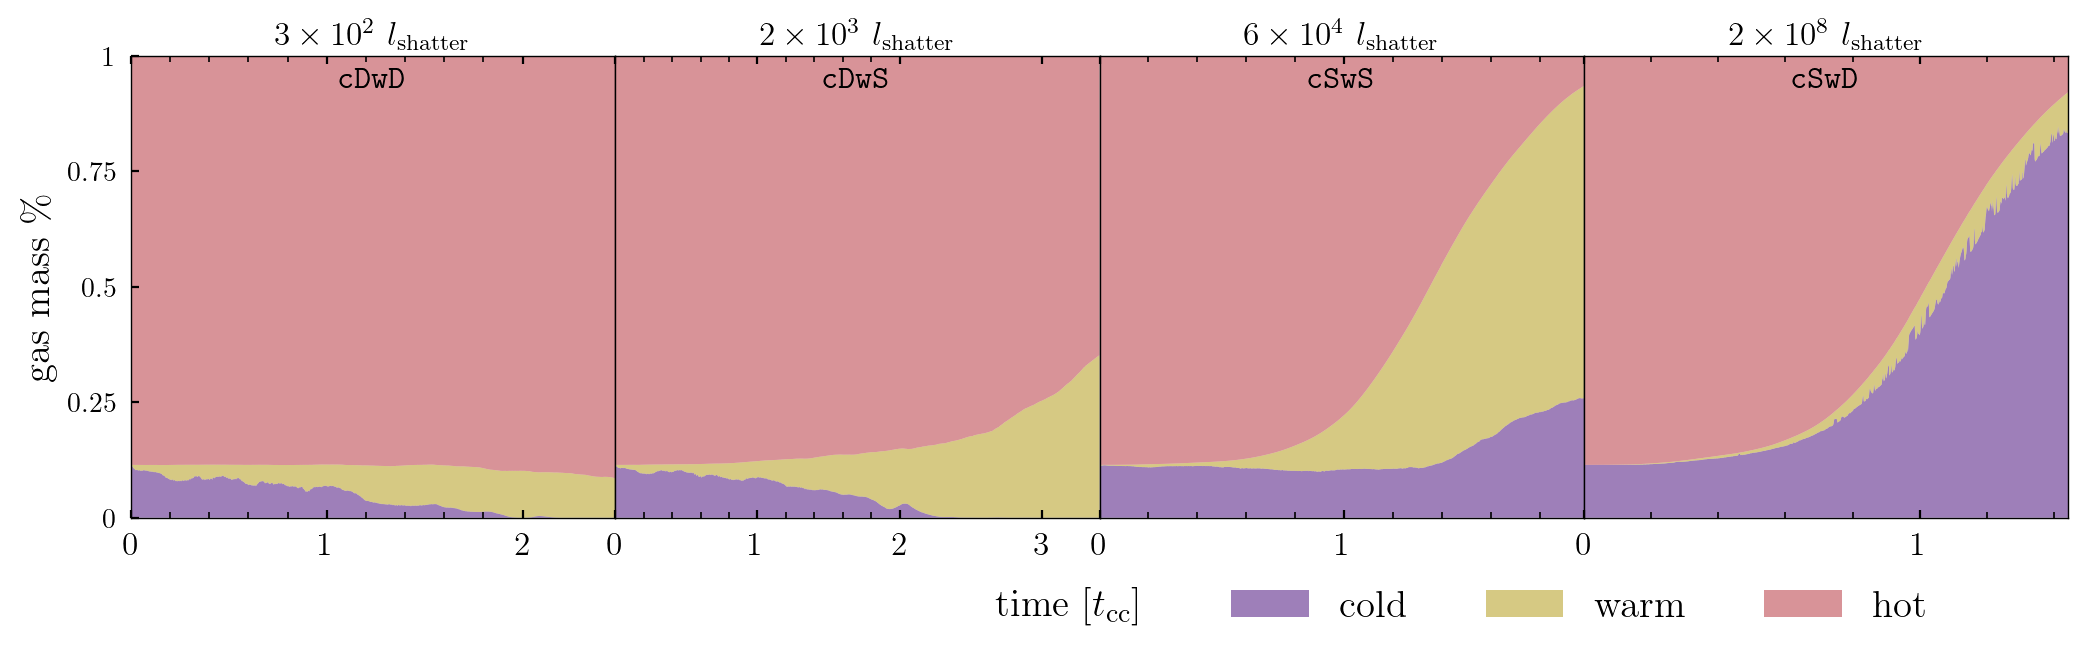

In [11]:
from codes.plotting import paper as pf

# the trials to use for each part of the param space
trials = '240711_0.8_320 240711_0.8_1600 240716_0.8_64000 240711_0.8_160000000'.split()

# phase_colors = ['royalblue', 'darkorange', 'crimson']
phase_colors = [cmr.take_cmap_colors('cmr.chroma', 1, cmap_range=(0.2, 0.3), return_fmt='hex'),
                cmr.take_cmap_colors('cmr.chroma', 1, cmap_range=(0.65, 0.75), return_fmt='hex'),
                cmr.take_cmap_colors('cmr.chroma', 1, cmap_range=(0.45, 0.55), return_fmt='hex')]

figname = 'app_mass_evol.pdf'
pf.app_mass_evol(figpath=f'{figdir}/{figname}',
                 trials=trials,
                 phase_colors=phase_colors,
                 lfs=12, tfs=14)